# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# Get the unique values of the type of city.
pyber_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
rides_per_city = pyber_data_df.groupby(["type"]).ride_id.count()
print(rides_per_city)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [5]:
# 2. Get the total drivers for each city type
drivers_per_city = city_data_df.groupby(["type"]).driver_count.sum()
print(drivers_per_city)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [6]:
#  3. Get the total amount of fares for each city type
tot_fares_per_city = pyber_data_df.groupby(["type"]).fare.sum()
print(tot_fares_per_city)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_city = pyber_data_df.groupby(["type"]).fare.mean()
print(avg_fares_per_city)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [8]:
#sum of all the fares/sum of ride per city type
avg_fare_r =  4327.93/125
avg_fare_s = 19356.33/625
avg_fare_u = 39854.38/1625

print(avg_fare_r)
print(avg_fare_s)
print(avg_fare_u)

34.62344
30.970128000000003
24.525772307692307


In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fares_per_driver_r =  4327.93/78
avg_fares_per_driver_s = 19356.33/490
avg_fares_per_driver_u = 39854.38/2405

print(avg_fares_per_driver_r)
print(avg_fares_per_driver_s)
print(avg_fares_per_driver_u)

55.48628205128205
39.50271428571429
16.571467775467774


In [10]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary =[{'Type': "Rural", 'Total Rides': 125, 'Total Drivers':78, 'Total Fares':4327.93, 'Avg Fare per Ride': 34.623440, 'Avg Fare per Driver': 55.486282},
 {'Type': "Suburban",'Total Rides': 625, 'Total Drivers':490, 'Total Fares':19356.33, 'Avg Fare per Ride': 30.970128, 'Avg Fare per Driver': 39.502714}, 
 {'Type': "Urban",'Total Rides': 1625, 'Total Drivers':2405, 'Total Fares':39854.38, 'Avg Fare per Ride': 24.525772, 'Avg Fare per Driver': 16.571468}, 
]

pyber_summary_df= pd.DataFrame(PyBer_summary)
pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per Ride"] = pyber_summary_df["Avg Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per Driver"] = pyber_summary_df["Avg Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
0,Rural,125,78,"$4,327.93",$34.62,$55.49
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_df = pyber_data_df.groupby(["date", "type"]).fare.sum()
fare_by_date_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_by_date_df = fare_by_date_df.reset_index()
fare_by_date_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date_pivot_df = fare_by_date_df.pivot(index = "date", columns = "type")["fare"]
fare_by_date_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_slice_df= fare_by_date_pivot_df.loc['2019-01-01':'2019-04-29']
fare_by_date_slice_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_by_date_slice_df.index = pd.to_datetime(fare_by_date_slice_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_slice_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [20]:
fare_by_date_slice_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_weekly_slice_df= fare_by_date_slice_df.resample("W").sum()
fare_by_weekly_slice_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


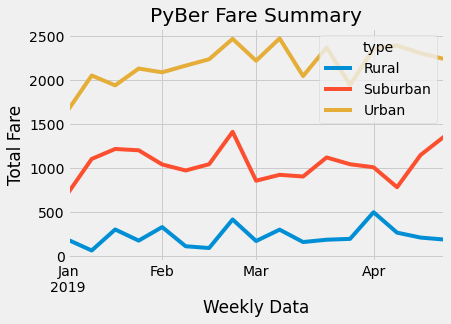

In [53]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_by_weekly_slice_df.plot()
plt.title("PyBer Fare Summary")
plt.ylabel('Total Fare')
plt.xlabel('Weekly Data')

plt.show

plt.savefig("PyBer_fare_summary.png")